<a href="https://colab.research.google.com/github/MRROOX/mii-analisis-de-datos/blob/master/Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para la tarea se deben utilizar las siguientes bases de datos:

* Iris https://archive.ics.uci.edu/ml/datasets/Iris
* MNIST http://yann.lecun.com/exdb/mnist/


Se recomienda hacer uso de las librerias de python indicadas en la conferencia (tener en cuentas al respecto
las funciones. fit, predict y predict proba asociadas). También es válido (pero más trabajoso) implementar
directamente la optimización asociada a los modelos, o utilizar librerı́as de R.
Las actividades solicitadas (junto con una descripción metodológica) son las siguientes:


**1. Entrenar los modelos estudiados para la base de datos Iris involucrando todas las variables.**

* Resolver los tres modelos presentados (Perceptron, Adaline y Regresión logı́stica) para la base de
datos Iris incluyendo las cuatro variables explicativas (sepal length, sepal width, petal length y petal
width) y dos de las tres categoı́as de flores (se reduce a 100 datos con 4 caracterı́sticas y dos clases).



**2. Estudiar la base de datos MINST y entrenar dos modelos (Adaline y Regresión logı́stica) para dos pro-
blemas de clasificación binaria (por ejemplo 3 vs. 3, pares vs no pares, etc.)**

* Tomar los datos de MNIST y preparar dos problemas de clasificación binarios, lo cual implica generar
la clase asociada a todas las observaciones (para cada problemas deben quedar 60.000 datos con 784
caracterı́sticas y dos clases)
* Entrenar los dos modelos mencionados anteriormente para los problemas de clasificación binaria
propuestos.

**3. En ambos casos (1 y 2) estudiar el número de aciertos del modelo en los datos de entrenamiento y probar
con distintos valores de corte.**
* Para todos los modelos entrenados en los puntos 1 y 2 calcular el porcentaje de aciertos en la
clasificación de todos los datos de entrenamiento.
* Para los modelos entrenados de tipo Adaline y Regresión Logı́stica preparar predictores con tres
valores de corte distintos, y comparar el porcentaje de aciertos de los predictores.

**4. Entrenar los modelos en los ejemplos anteriores con distintos valores del learning rate (entre 0.0001 y
1000) y documentar diferencias observadas.**

* Entrenar los modelos solo de tipo Adaline (SGDRegressor) con varios valores del learning rate y
documentar las diferencias observadas en cuanto a la ejecución del entrenamiento y la calidad del
predictor que se genera (por ejemplo mirando el porcentaje de aciertos).


In [0]:
# Generando los datos para clustering

# Cargando los datos Iris

import pandas as pd
import numpy as np

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases/iris/iris.data',
                 header=None)

In [0]:
df.columns = ['sepal length', 'sepal width','petal length', 'petal width', 'class']

df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


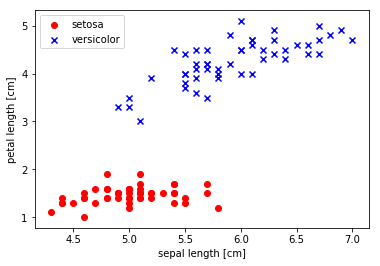

In [0]:
# Separabilidad ploteo de las clases Setosa y Versicolor en las dos variables legth
import matplotlib.pyplot as plt

X_setosa=df.loc[df['class']=='Iris-setosa'].loc[:,['sepal length', 'petal length']].values
X_versicolor=df.loc[df['class']=='Iris-versicolor'].loc[:,['sepal length', 'petal length']].values
X_virginica=df.loc[df['class']=='Iris-virginica'].loc[:,['sepal length', 'petal length']].values



plt.scatter(X_setosa[:,0],X_setosa[:,1], color='red',marker='o', label='setosa')
plt.scatter(X_versicolor[:,0],X_versicolor[:,1], color='blue',marker='x', label='versicolor')
#plt.scatter(X_virginica[:,0],X_virginica[:,1], color='green',marker='*', label='virginica')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()
#%%

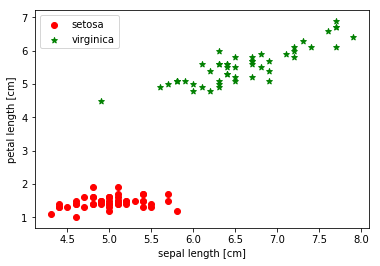

In [0]:
# Separabilidad ploteo de las clases Setosa y Virginica en las dos variables legth

plt.scatter(X_setosa[:,0],X_setosa[:,1], color='red',marker='o', label='setosa')
#plt.scatter(X_versicolor[:,0],X_versicolor[:,1], color='blue',marker='x', label='versicolor')
plt.scatter(X_virginica[:,0],X_virginica[:,1], color='green',marker='*', label='virginica')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

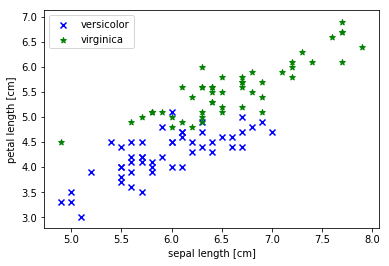

In [0]:
# No separabilidad ploteo de las clases  Virginica y Versicolor en las dos variables legth

#plt.scatter(X_setosa[:,0],X_setosa[:,1], color='red',marker='o', label='setosa')
plt.scatter(X_versicolor[:,0],X_versicolor[:,1], color='blue',marker='x', label='versicolor')
plt.scatter(X_virginica[:,0],X_virginica[:,1], color='green',marker='*', label='virginica')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


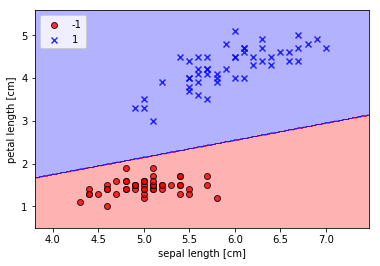

In [0]:
# Perceptron para clases separables Setosa y Versicolor 

df_setosa_versicolor=df.loc[df['class'].isin(['Iris-setosa','Iris-versicolor'])]
X_setosa_versicolor=df_setosa_versicolor.loc[:,['sepal length', 'petal length']].values
y_setosa_versicolor=np.where(df_setosa_versicolor.loc[:,['class']].values== 'Iris-setosa',-1,1)

from sklearn.linear_model import Perceptron
ppn=Perceptron(max_iter=40,eta0=0.1,random_state=1)
ppn.fit(X_setosa_versicolor,y_setosa_versicolor)

from matplotlib.colors import ListedColormap


def plot_decision_regions(X,y, classifier, markers=['o','x'],colors=['red','blue'],predict_proba=False,threshold=0.0,resolution=0.02):
    
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min() -0.5 ,  X[:,0].max() +0.5
    x2_min, x2_max = X[:,1].min() -0.5,  X[:,1].max() +0.5
    
    xx1, xx2 =np.meshgrid(np.arange(x1_min,x1_max,resolution),
                          np.arange(x2_min,x2_max,resolution))
    if predict_proba:
        Z= classifier.predict_proba(np.array([xx1.ravel(), xx2.ravel()]).T)[:,1]
        Z=np.where(Z>=threshold,1,0)
    else:
        Z= classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z=np.where(Z>=threshold,1,-1)
    
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],
                    y=X[y==cl,1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')
        
plot_decision_regions(X_setosa_versicolor,y_setosa_versicolor.ravel(), classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


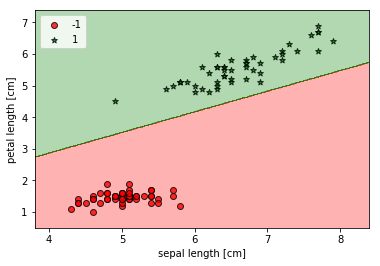

In [0]:
# Perceptron para clases separables Setosa y Virginica 

df_setosa_virginica=df.loc[df['class'].isin(['Iris-setosa','Iris-virginica'])]
X_setosa_virginica=df_setosa_virginica.loc[:,['sepal length', 'petal length']].values
y_setosa_virginica=np.where(df_setosa_virginica.loc[:,['class']].values== 'Iris-setosa',-1,1)

from sklearn.linear_model import Perceptron
ppn=Perceptron(max_iter=40,eta0=0.1,random_state=1)
ppn.fit(X_setosa_virginica,y_setosa_virginica)

plot_decision_regions(X_setosa_virginica,y_setosa_virginica.ravel(), classifier=ppn,markers=['o','*'],colors=['red','green'])
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


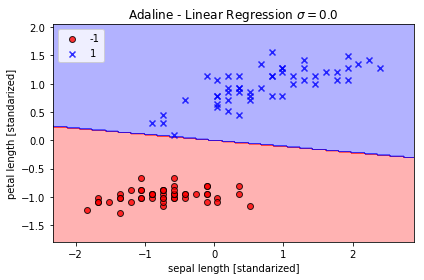

In [0]:
# Adaline - Linear Regressor para clases separables Setosa y Versicolor (estandarizadas) 

from sklearn import linear_model

X_set_ver_std=np.copy(X_setosa_versicolor)

X_set_ver_std[:,0]=(X_setosa_versicolor[:,0]-X_setosa_versicolor[:,0].mean())/X_setosa_versicolor[:,0].std()
X_set_ver_std[:,1]=(X_setosa_versicolor[:,1]-X_setosa_versicolor[:,1].mean())/X_setosa_versicolor[:,1].std()


ada = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
ada.fit(X_set_ver_std,y_setosa_versicolor)

plot_decision_regions(X_set_ver_std,y_setosa_versicolor.ravel(), classifier=ada,predict_proba=False,threshold=0.0)
plt.title('Adaline - Linear Regression $\sigma=0.0$')
plt.xlabel('sepal length [standarized]')
plt.ylabel('petal length [standarized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


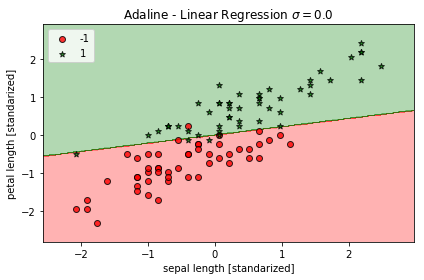

In [0]:
# Adaline - Linear Regressor para clases no separables Versicolor  y Virginica

df_versicolor_virginica=df.loc[df['class'].isin(['Iris-versicolor','Iris-virginica'])]
X_versicolor_virginica=df_versicolor_virginica.loc[:,['sepal length', 'petal length']].values
y_versicolor_virginica=np.where(df_versicolor_virginica.loc[:,['class']].values== 'Iris-versicolor',-1,1)


X_ver_vir_std=np.copy(X_versicolor_virginica)

X_ver_vir_std[:,0]=(X_versicolor_virginica[:,0]-X_versicolor_virginica[:,0].mean())/X_versicolor_virginica[:,0].std()
X_ver_vir_std[:,1]=(X_versicolor_virginica[:,1]-X_versicolor_virginica[:,1].mean())/X_versicolor_virginica[:,1].std()

ada = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
ada.fit(X_ver_vir_std,y_versicolor_virginica)

plot_decision_regions(X_ver_vir_std,y_versicolor_virginica.ravel(), classifier=ada,markers=['o','*'],colors=['red','green'],predict_proba=False,threshold=0.0)
plt.title('Adaline - Linear Regression $\sigma=0.0$')
plt.xlabel('sepal length [standarized]')
plt.ylabel('petal length [standarized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


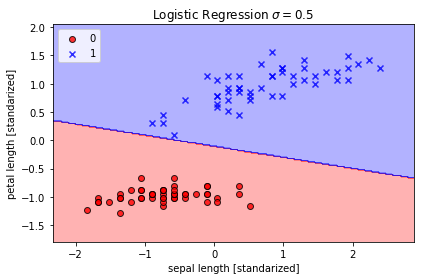

In [0]:
# logistic Regression para clases separables Setosa y Versicolor (estandarizadas) 

y_setosa_versicolor=np.where(df_setosa_versicolor.loc[:,['class']].values== 'Iris-setosa',0,1)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_set_ver_std, y_setosa_versicolor)

plot_decision_regions(X_set_ver_std, y_setosa_versicolor.ravel(), classifier=log_reg,markers=['o','x'],colors=['red','blue'],predict_proba=True,threshold=0.5)
plt.title('Logistic Regression $\sigma=0.5$')
plt.xlabel('sepal length [standarized]')
plt.ylabel('petal length [standarized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()